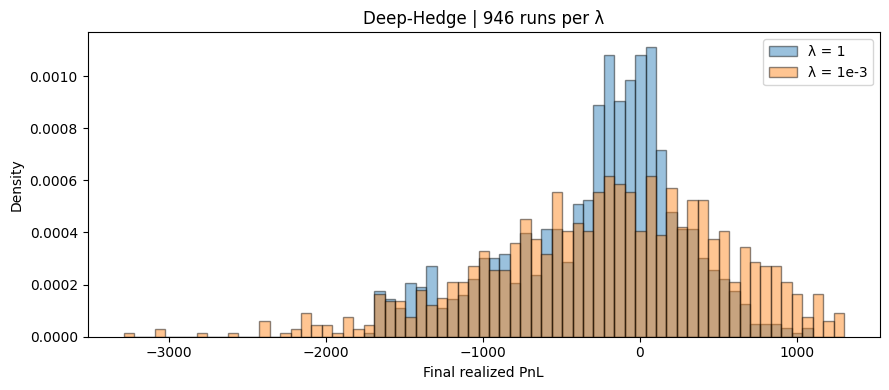


──────── summary by λ ────────
λ = 1     | μ=-276.97  σ= 548.23  5–95%=[-1399.30; 501.67]
λ = 1e-3  | μ=-225.21  σ= 760.00  5–95%=[-1585.73; 905.18]


In [1]:
import matplotlib.pyplot as plt
import numpy as np

runs = {
    r"C:\Users\idine\PycharmProjects\Deep Hedging\final data\CNN, 1e-3, 1000, 6k.npy": "λ = 1",
    r"C:\Users\idine\PycharmProjects\Deep Hedging\final data\CNN, l1, 1000, 6.npy": "λ = 1e-3",
}

data, stats = {}, {}          # label → ndarray  / summary

for path, label in runs.items():
    arr          = np.load(path)
    data[label]  = arr
    stats[label] = dict(mu=arr.mean(),
                        sigma=arr.std(ddof=1),
                        p05=np.percentile(arr, 5),
                        p95=np.percentile(arr, 95))

# ❷  единые границы и бины
all_vals = np.concatenate(list(data.values()))
bins     = np.linspace(all_vals.min(), all_vals.max(), 70)

# ❸  график (накладываем гистограммы полупрозрачно)
plt.figure(figsize=(9, 4))
for label, arr in data.items():
    plt.hist(arr, bins=bins, alpha=0.45, edgecolor="k",
             density=True, label=label)

plt.xlabel("Final realized PnL")
plt.ylabel("Density")
plt.title(f"Deep-Hedge | {len(next(iter(data.values())))} runs per λ")
plt.legend()
plt.tight_layout()
plt.show()

print("\n──────── summary by λ ────────")
for label, s in stats.items():
    print(f"{label:9} | μ={s['mu']:7.2f}  σ={s['sigma']:7.2f}  "
          f"5–95%=[{s['p05']:6.2f}; {s['p95']:6.2f}]")